# 컨볼루션 신경망(Convolution Neural Network, CNN)

## 주요 레이어

### Conv2D

- `tensorflow.keras.layers.Conv2D`

- `tf.nn.conv2d`

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import numpy as np
from sklearn.datasets import load_sample_image

In [2]:
china = load_sample_image("china.jpg") / 255.
print(china.dtype)
print(china.shape)

float64
(427, 640, 3)


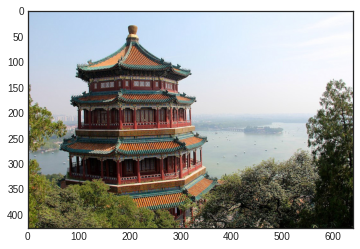

In [3]:
plt.imshow(china)
plt.show()

In [4]:
flower = load_sample_image("flower.jpg") / 255
print(flower.dtype)
print(flower.shape)

float64
(427, 640, 3)


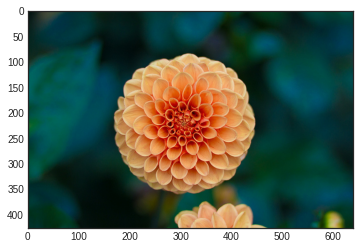

In [5]:
plt.imshow(flower)
plt.show()

In [6]:
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
print(images.shape)

(2, 427, 640, 3)


In [7]:
filters = np.zeros(shape = (7, 7, channels, 2), dtype = np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1
print(filters.shape)

(7, 7, 3, 2)


(2, 427, 640, 2)


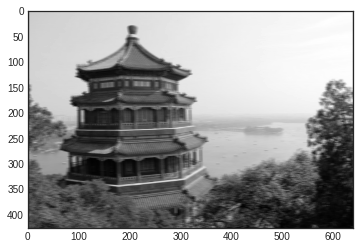

In [8]:
outputs = tf.nn.conv2d(images, filters, strides = 1, padding = 'SAME')
print(outputs.shape)
plt.imshow(outputs[0, :, :, 1], cmap = 'gray')
plt.show()

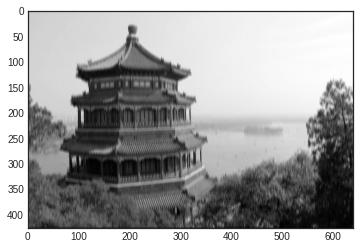

In [9]:
plt.imshow(outputs[0, :, :, 0], cmap = 'gray')
plt.show()

In [10]:
conv = Conv2D(filters = 32, kernel_size = 3, strides = 1,
              padding = 'same', activation = 'relu')

### MaxPool2D

- 텐서플로 저수준 딥러닝 API
  - `tf.nn.max_pool`
  - 사용자가 사이즈를 맞춰줘야함
  - 케라스의 모델의 층으로 사용하고 싶으면 Lambda층으로 감싸줘야함

- 케라스 고수준 API
  - `keras.layers.MaxPool2D`


In [12]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D, Lambda


In [13]:
ouput = tf.nn.max_pool(images,
                       ksize = (1, 1, 1, 3),
                       strides = (1, 1, 1, 3),
                       padding = 'VALID')

In [14]:
output_keras = Lambda(
    lambda X: tf.nn.max_pool(X, ksize = (1, 1, 1, 3),
                             strides = (1, 1, 1, 3), 
                             padding = 'VALID')
)

In [15]:
max_pool = MaxPool2D(pool_size = 2)

In [16]:
flower = load_sample_image('flower.jpg') / 255
print(flower.dtype)
print(flower.shape)

float64
(427, 640, 3)


In [17]:
flower = np.expand_dims(flower, axis = 0)
flower.shape

(1, 427, 640, 3)

In [18]:
output = Conv2D(filters = 32, kernel_size = 3,
                strides = 1, padding = 'same',
                activation = 'relu')(flower)
output = MaxPool2D(pool_size = 2)(output)

output.shape


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



TensorShape([1, 213, 320, 32])

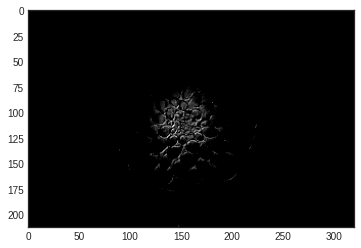

In [19]:
plt.imshow(output[0, :, :, 4], cmap = 'gray')
plt.show()

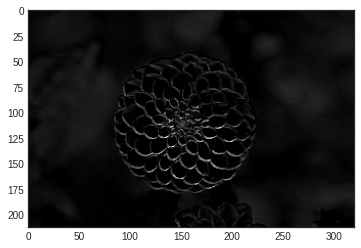

In [22]:
plt.imshow(output[0, :, :, 8], cmap = 'gray')
plt.show()

### AvgPool2D

- 텐서플로 저수준 딥러닝 API
  - `tf.nn.avg_pool`

- 케라스 고수준 API
  - `keras.layers.AvgPool2D`

In [23]:
from tensorflow.keras.layers import AvgPool2D

In [24]:
flower.shape

(1, 427, 640, 3)

In [26]:
output = Conv2D(filters = 32, kernel_size = 3, 
                strides = 1,
                padding = 'same', 
                activation = 'relu')(flower)
output = AvgPool2D(pool_size = 2)(output)

output.shape


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



TensorShape([1, 213, 320, 32])

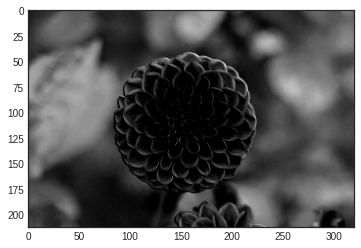

In [28]:
plt.imshow(output[0, :, :, 2], cmap = 'gray')
plt.show()

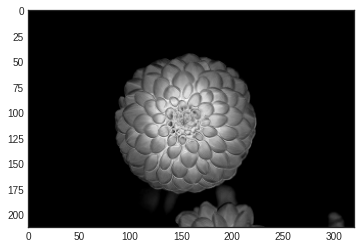

In [29]:
plt.imshow(output[0, :, :, 8], cmap = 'gray')
plt.show()

### GlobalAvgPool2D (전역 평균 풀링 층)

- `keras.layers.GlobalAvgPool2D()`

- 특징 맵 각각의 평균값을 출력하는 것이므로, 특성맵에 있는 대부분의 정보를 잃음

- 출력층에는 유용할 수 있음

In [31]:
from tensorflow.keras.layers import GlobalAvgPool2D


In [32]:
flower.shape

(1, 427, 640, 3)

In [33]:
output = Conv2D(filters = 32, kernel_size = 3,
                strides = 1, padding = 'same', 
                activation = 'relu')(flower)
output = GlobalAvgPool2D()(output)

output.shape


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



TensorShape([1, 32])

## 예제로 보는 CNN 구조와 학습
- 모델 구현은 참고만


- [런타임] - [런타임 유형변경] - GPU 변경

### 일반적인 구조

#### modules import

In [23]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [24]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, AvgPool2D, Dropout

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical, plot_model

#### 데이터 로드 및 전처리

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [6]:
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [8]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

#### CNN을 위한 간단한 모델

In [9]:
def build():

    model = Sequential([Conv2D(64, 7, activation = 'relu', padding = 'same', input_shape = [28, 28, 1]),
                        MaxPool2D(pool_size = 2),
                        Conv2D(128, 3, activation = 'relu', padding = 'same'),
                        MaxPool2D(pool_size = 2),
                        Conv2D(256, 3, activation = 'relu', padding = 'same'),
                        MaxPool2D(2),
                        Flatten(),
                        Dense(128, activation = 'relu'),
                        Dropout(0.5),
                        Dense(64, activation = 'relu'),
                        Dropout(0.5),
                        Dense(10, activation = 'softmax')])
    
    return model

#### 모델 컴파일

In [11]:
model = build()

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


In [12]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

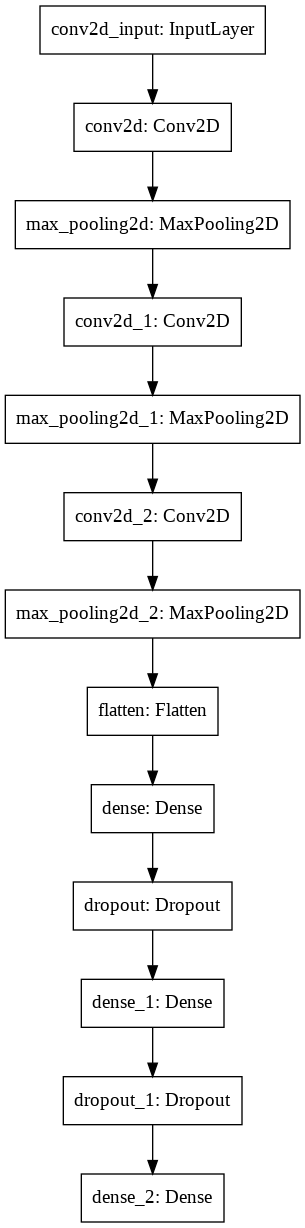

In [13]:
plot_model(model)

In [14]:
callbacks = [tf.keras.callbacks.TensorBoard(log_dir = './logs')]

#### Hyper Parameters

In [15]:
EPOCHS = 20
BATCH_SIZE = 200
VERBOSE = 1

#### 모델 학습
- `validation_split` 을 통해 검증 데이터셋을 생성


In [16]:
hist = model.fit(x_train, y_train,
                 epochs = EPOCHS,
                 batch_size = BATCH_SIZE,
                 validation_split = 0.3,
                 callbacks = callbacks,
                 verbose = VERBOSE)

Epoch 1/20
  1/210 [..............................] - ETA: 0s - loss: 2.2945 - accuracy: 0.1250WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
210/210 [==============================] - 4s 17ms/step - loss: 1.0630 - accuracy: 0.6130 - val_loss: 0.4956 - val_accuracy: 0.8147
Epoch 2/20
210/210 [==============================] - 3s 16ms/step - loss: 0.5983 - accuracy: 0.7926 - val_loss: 0.3918 - val_accuracy: 0.8619
Epoch 3/20
210/210 [==============================] - 3s 16ms/step - loss: 0.4824 - accuracy: 0.8342 - val_loss: 0.3702 - val_accuracy: 0.8631
Epoch 4/20
210/210 [==============================] - 3s 16ms/step - loss: 0.4272 - accuracy: 0.8541 - val_loss: 0.3533 - val_accuracy: 0.8682
Epoch 5/20
210/210 [==============================] - 3s 16ms/step

In [25]:
log_dir = './logs' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [27]:
%tensorboard -- logdir logs/

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2020-09-11 18:16:19.555835: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--purge_orphaned_data BOOL] [--db URI] [--db_import]
                   [--inspect] [--version_tb] [--tag TAG] [--event_file PATH]
                   [--path_prefix PATH] [--window_title TEXT]
                   [--max_reload_threads COUNT] [--reload_interval SECONDS]
                   [--reload_task TYPE] [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [--debugger_data_server_grpc_port PORT]
                   [--debugger_port PORT]
                   [--

### LeNet-5

- 필기체 인식을 위한 모델

  <img src="https://hoya012.github.io/assets/img/image_classification_guidebook/1.PNG">

  <sub>https://www.researchgate.net/figure/The-LeNet-5-Architecture-a-convolutional-neural-network_fig4_321586653</sub>

- 코드 출처 : http://datahacker.rs/lenet-5-implementation-tensorflow-2-0/

#### module import

In [28]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, AvgPool2D, Dropout

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical, plot_model

from sklearn.model_selection import train_test_split

#### 데이터 로드 및 전처리

In [30]:
(x_train_full, y_train_full), (x_test, y_test) = datasets.mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size = 0.3,
                                                  random_state = 777)

x_train = x_train[..., np.newaxis]
x_val = x_val[..., np.newaxis]
x_test = x_test[..., np.newaxis]

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)


x_train = x_train.astype("float32")
x_val = x_val.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255.
x_val /= 255.
x_test /= 255.

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(42000, 28, 28, 1)
(42000, 10)
(18000, 28, 28, 1)
(18000, 10)
(10000, 28, 28, 1)
(10000, 10)


#### 모델 구성 및 컴파일

In [31]:
class LeNet(Sequential):

    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(Conv2D(6, kernel_size = (5, 5), strides = (1, 1), activation = 'tanh', input_shape = input_shape, padding = 'same'))
        self.add(AvgPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
        self.add(Conv2D(16, kernel_size = (5, 5), strides = (1, 1), activation = 'tanh', padding = 'valid'))
        self.add(AvgPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
        self.add(Flatten())
        self.add(Dense(120, activation = 'tanh'))
        self.add(Dense(84, activation = 'tanh'))
        self.add(Dense(nb_classes, activation = 'softmax'))

        self.compile(optimizer = 'adam',
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])
        
        

In [32]:
model = LeNet(input_shape = (28, 28, 1), nb_classes = 10)

In [33]:
model.summary()

Model: "le_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)                10164

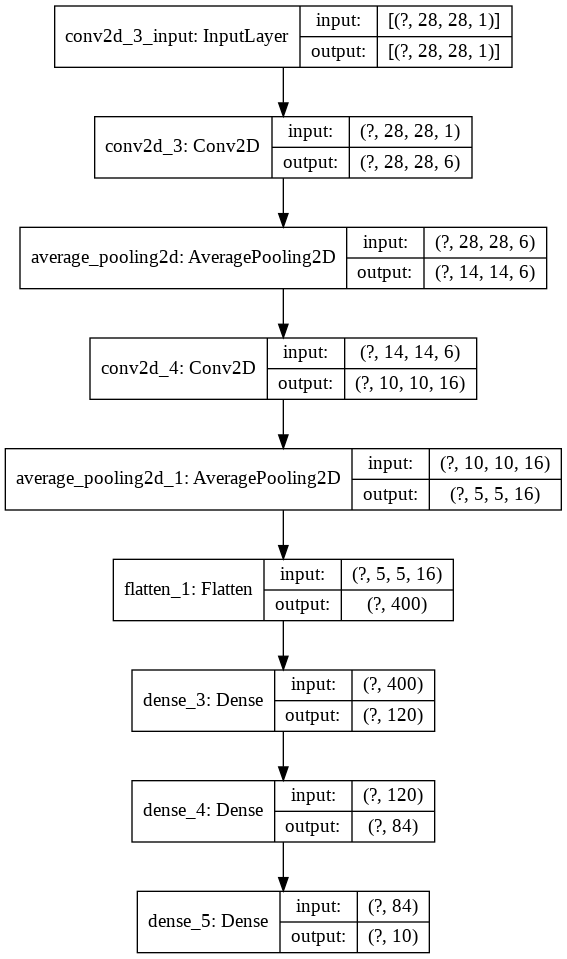

In [34]:
plot_model(model, show_shapes=True)

#### Hyper Parameters

In [35]:
EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1

#### 모델 학습

In [36]:
hist = model.fit(x_train, y_train, 
                 epochs = EPOCHS,
                 batch_size = BATCH_SIZE,
                 validation_data = (x_val, y_val),
                 verbose = VERBOSE)

Epoch 1/20
329/329 [==============================] - 2s 6ms/step - loss: 0.4126 - accuracy: 0.8831 - val_loss: 0.2021 - val_accuracy: 0.9404
Epoch 2/20
329/329 [==============================] - 2s 5ms/step - loss: 0.1637 - accuracy: 0.9505 - val_loss: 0.1318 - val_accuracy: 0.9586
Epoch 3/20
329/329 [==============================] - 2s 5ms/step - loss: 0.1108 - accuracy: 0.9665 - val_loss: 0.1035 - val_accuracy: 0.9695
Epoch 4/20
329/329 [==============================] - 2s 5ms/step - loss: 0.0818 - accuracy: 0.9745 - val_loss: 0.0816 - val_accuracy: 0.9756
Epoch 5/20
329/329 [==============================] - 2s 5ms/step - loss: 0.0649 - accuracy: 0.9803 - val_loss: 0.0746 - val_accuracy: 0.9764
Epoch 6/20
329/329 [==============================] - 2s 5ms/step - loss: 0.0524 - accuracy: 0.9842 - val_loss: 0.0742 - val_accuracy: 0.9781
Epoch 7/20
329/329 [==============================] - 2s 5ms/step - loss: 0.0434 - accuracy: 0.9868 - val_loss: 0.0609 - val_accuracy: 0.9821
Epoch 

#### 학습 결과 시각화

In [37]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

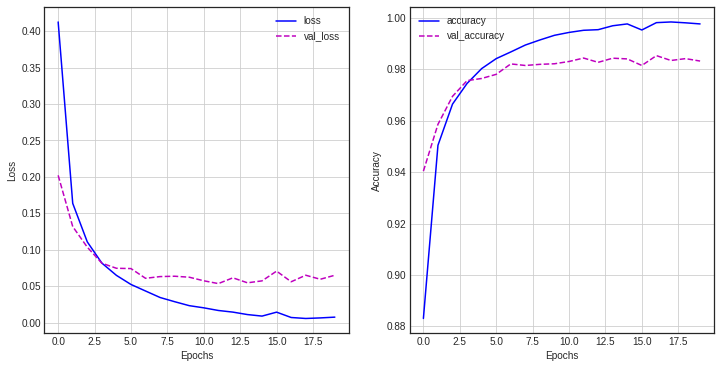

In [42]:
plt.figure(figsize = (12, 6))


plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label = 'loss')
plt.plot(hist.history['val_loss'], 'm--', label = 'val_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], 'b-', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], 'm--', label = 'val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.show()



#### 모델 평가

In [43]:
model.evaluate(x_test, y_test) # loss, accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.0635 - accuracy: 0.9832


[0.06348476558923721, 0.9832000136375427]